In [1]:
import pandas as pd
import scanpy as sc
import numpy as np

In [2]:
folderWithFiles='/media/kush/2TB HDD A/kallisto_bustools_getting_started/bus_output_07/spliced'

In [3]:
matrix=sc.read_mtx(folderWithFiles+'/s.mtx')

In [4]:
barcodes=pd.read_csv(folderWithFiles+'/s.barcodes.txt',header=None)

In [5]:
genes=pd.read_csv(folderWithFiles+'/s.genes.txt',header=None)

In [6]:
matrix.obs.index = barcodes[0].values

In [7]:
matrix.var.index = genes[0].values

In [8]:
barcodes["sample"]="07"

In [9]:
barcodes.columns=["bcs","sample"]

In [10]:
barcodes.index=barcodes["bcs"]+"."+barcodes["sample"]

In [11]:
genes.columns=["gid"]

In [12]:
import anndata

In [13]:
matrix

AnnData object with n_obs × n_vars = 299566 × 64792 

In [14]:
import scipy as scp

In [15]:
sparse=scp.sparse.vstack([matrix.X])

In [16]:
sadata=anndata.AnnData(X=sparse,obs=barcodes,var=genes)

Transforming to str index.


In [17]:
print(sadata)

AnnData object with n_obs × n_vars = 299566 × 64792 
    obs: 'bcs', 'sample'
    var: 'gid'


In [18]:
sc.pp.filter_cells(sadata,min_genes=200)

In [19]:
sc.pp.filter_genes(sadata,min_cells=3)

In [20]:
sadata

AnnData object with n_obs × n_vars = 8188 × 18957 
    obs: 'bcs', 'sample', 'n_genes'
    var: 'gid', 'n_cells'

In [21]:
sc.tl.pca(sadata,svd_solver='arpack')

In [22]:
barcodes

,bcs,sample
AAACCTGAGAAACCTA.07,AAACCTGAGAAACCTA,07
AAACCTGAGAAACGAG.07,AAACCTGAGAAACGAG,07
AAACCTGAGAAACGCC.07,AAACCTGAGAAACGCC,07
AAACCTGAGAACAATC.07,AAACCTGAGAACAATC,07
AAACCTGAGAAGGTGA.07,AAACCTGAGAAGGTGA,07
...,...,...
TTTGTCATCTTGTATC.07,TTTGTCATCTTGTATC,07
TTTGTCATCTTGTTTG.07,TTTGTCATCTTGTTTG,07
TTTGTCATCTTTACAC.07,TTTGTCATCTTTACAC,07
TTTGTCATCTTTACGT.07,TTTGTCATCTTTACGT,07


In [23]:
genes

,gid
0,ENSG00000223972
1,ENSG00000227232
2,ENSG00000278267
3,ENSG00000243485
4,ENSG00000284332
...,...
64787,ENSG00000275757
64788,ENSG00000278573
64789,ENSG00000276017
64790,ENSG00000278817


... storing 'sample' as categorical


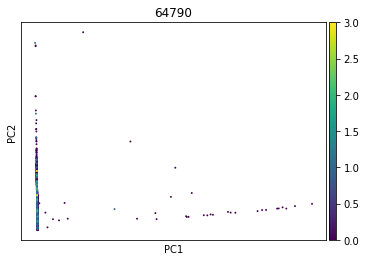

In [24]:
sc.pl.pca(sadata,color='64790')

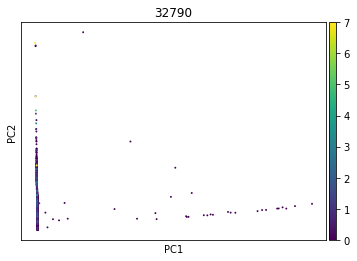

In [25]:
sc.pl.pca(sadata,color='32790')

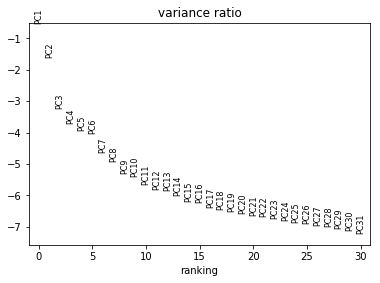

In [26]:
sc.pl.pca_variance_ratio(sadata, log=True)

In [27]:
sadata

AnnData object with n_obs × n_vars = 8188 × 18957 
    obs: 'bcs', 'sample', 'n_genes'
    var: 'gid', 'n_cells'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [28]:
sc.tl.pca(sadata)

In [29]:
sadata

AnnData object with n_obs × n_vars = 8188 × 18957 
    obs: 'bcs', 'sample', 'n_genes'
    var: 'gid', 'n_cells'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [30]:
results_file = '/media/kush/2TB HDD A/kallisto_bustools_getting_started/bus_output_07/spliced/write/pbmc3k.h5ad'

In [31]:
sadata.write(results_file)

In [32]:
sadata

AnnData object with n_obs × n_vars = 8188 × 18957 
    obs: 'bcs', 'sample', 'n_genes'
    var: 'gid', 'n_cells'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [33]:
sc.pp.neighbors(sadata,n_neighbors=10,n_pcs=40)

In [34]:
sadata

AnnData object with n_obs × n_vars = 8188 × 18957 
    obs: 'bcs', 'sample', 'n_genes'
    var: 'gid', 'n_cells'
    uns: 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'

In [35]:
sc.tl.umap(sadata)

In [36]:
sadata

AnnData object with n_obs × n_vars = 8188 × 18957 
    obs: 'bcs', 'sample', 'n_genes'
    var: 'gid', 'n_cells'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [37]:
genes

,gid
0,ENSG00000223972
1,ENSG00000227232
2,ENSG00000278267
3,ENSG00000243485
4,ENSG00000284332
...,...
64787,ENSG00000275757
64788,ENSG00000278573
64789,ENSG00000276017
64790,ENSG00000278817


In [38]:
genes

,gid
0,ENSG00000223972
1,ENSG00000227232
2,ENSG00000278267
3,ENSG00000243485
4,ENSG00000284332
...,...
64787,ENSG00000275757
64788,ENSG00000278573
64789,ENSG00000276017
64790,ENSG00000278817


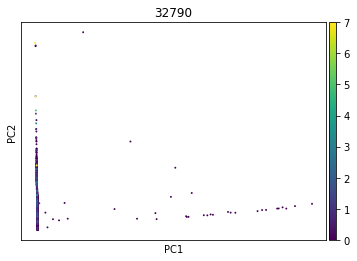

In [39]:
sc.pl.pca(sadata,color='32790')

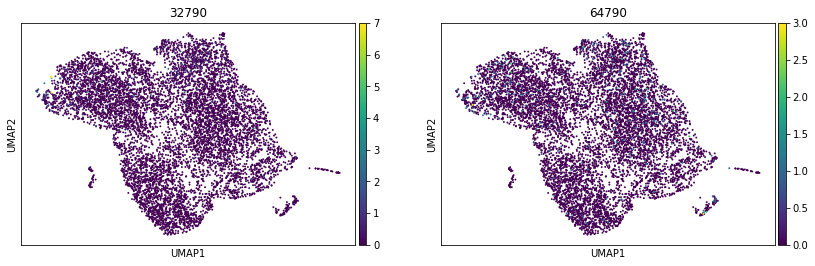

In [40]:
sc.pl.umap(sadata,color=['32790','64790'])

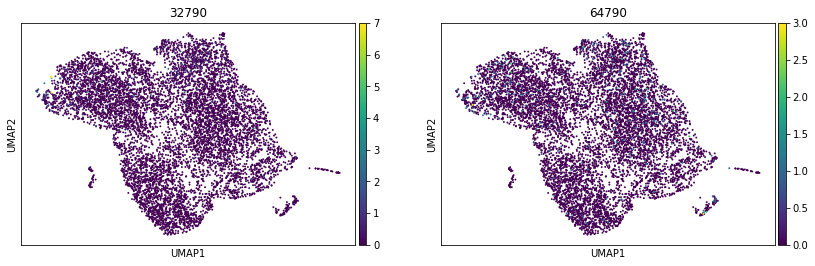

In [41]:
sc.pl.umap(sadata,color=['32790','64790'],use_raw=False)

In [42]:
sadata

AnnData object with n_obs × n_vars = 8188 × 18957 
    obs: 'bcs', 'sample', 'n_genes'
    var: 'gid', 'n_cells'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [43]:
sc.tl.leiden(sadata)

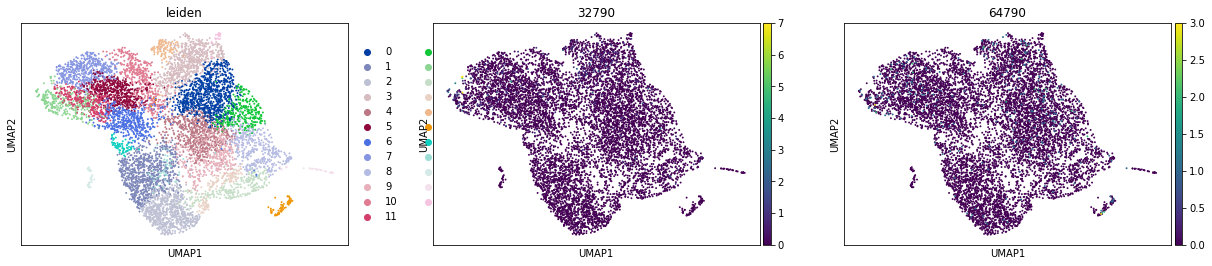

In [44]:
sc.pl.umap(sadata,color=['leiden','32790','64790'])

In [45]:
sadata.write(results_file)

In [46]:
sc.tl.tsne(sadata,None,None,30,12,1000,0,True,None,False)

In [47]:
sadata

AnnData object with n_obs × n_vars = 8188 × 18957 
    obs: 'bcs', 'sample', 'n_genes', 'leiden'
    var: 'gid', 'n_cells'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'

In [49]:
sadata.write(results_file)

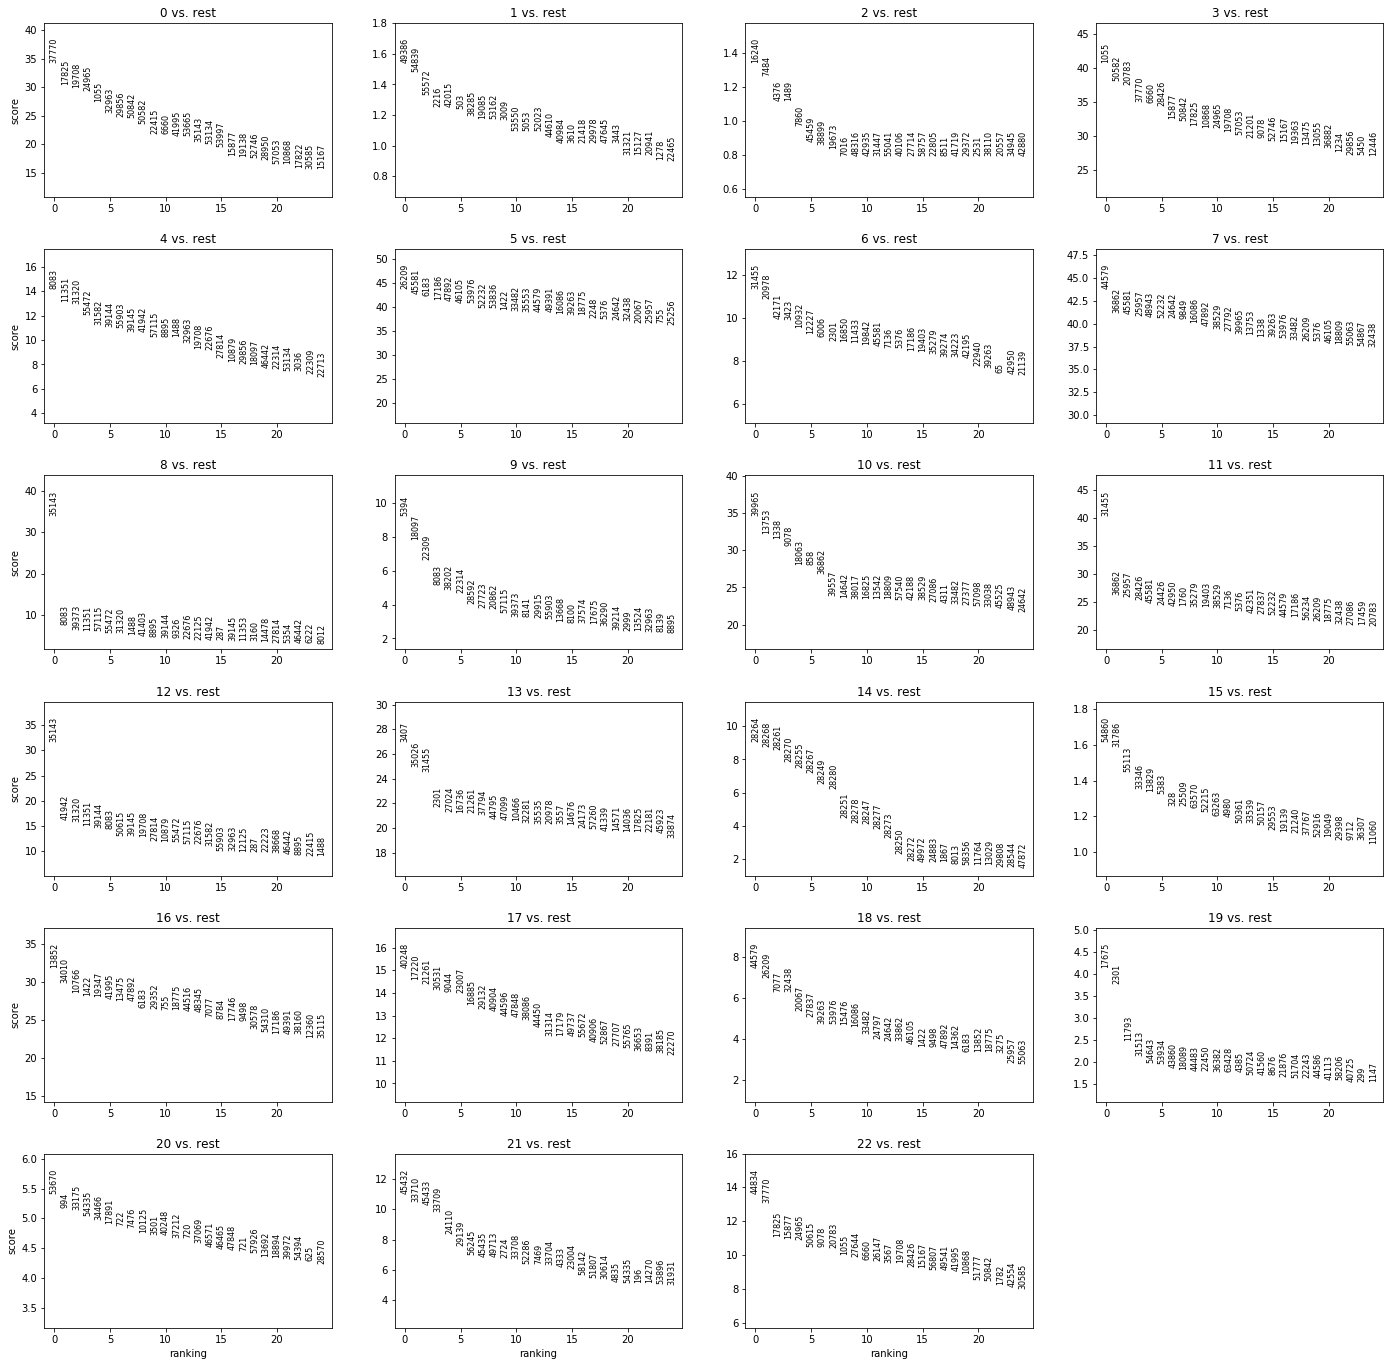

In [51]:
sc.pl.rank_genes_groups(sadata,n_genes=25,sharey=False)

In [52]:
sc.tl.rank_genes_groups(sadata,'leiden',True,'all','rest',100,False,None,False,'t-test','benjamini-hochberg',None)

In [53]:
sadata

AnnData object with n_obs × n_vars = 8188 × 18957 
    obs: 'bcs', 'sample', 'n_genes', 'leiden'
    var: 'gid', 'n_cells'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'

In [54]:
sadata.write(results_file)

In [55]:
marker_genes=['32790','64790']

In [57]:
pd.DataFrame(sadata.uns['rank_genes_groups']['names']).head(5)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,37770,49386,16240,1055,8083,26209,31455,44579,35143,5394,...,3407,28264,54860,13852,40248,44579,17675,53670,45432,44834
1,17825,54839,7484,50582,11351,45581,20978,36862,8083,18097,...,35026,28268,31786,34010,17220,26209,2301,994,33710,37770
2,19708,55572,4376,20783,31320,6183,42171,45581,39373,22309,...,31455,28261,55113,10766,21261,7077,11793,33175,45433,17825
3,24965,2216,1489,37770,55472,17186,3423,25957,11351,8083,...,2301,28270,33346,1422,30531,32438,31513,54335,33709,15877
4,1055,42015,7860,6660,31582,47892,10932,48943,57115,38202,...,27024,28255,13829,19347,9044,20067,54643,34466,24110,24965


In [58]:
sadata

AnnData object with n_obs × n_vars = 8188 × 18957 
    obs: 'bcs', 'sample', 'n_genes', 'leiden'
    var: 'gid', 'n_cells'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'

In [59]:
sadata.write(results_file)

In [60]:
sadata

AnnData object with n_obs × n_vars = 8188 × 18957 
    obs: 'bcs', 'sample', 'n_genes', 'leiden'
    var: 'gid', 'n_cells'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'

In [61]:
genes

,gid
0,ENSG00000223972
1,ENSG00000227232
2,ENSG00000278267
3,ENSG00000243485
4,ENSG00000284332
...,...
64787,ENSG00000275757
64788,ENSG00000278573
64789,ENSG00000276017
64790,ENSG00000278817


IndexError: Key "64787" is not valid observation/variable name/index.

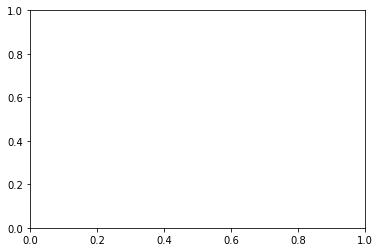

In [66]:
sc.pl.pca(sadata,color='64787')

In [65]:
genes

,gid
0,ENSG00000223972
1,ENSG00000227232
2,ENSG00000278267
3,ENSG00000243485
4,ENSG00000284332
...,...
64787,ENSG00000275757
64788,ENSG00000278573
64789,ENSG00000276017
64790,ENSG00000278817


In [67]:
sadata

AnnData object with n_obs × n_vars = 8188 × 18957 
    obs: 'bcs', 'sample', 'n_genes', 'leiden'
    var: 'gid', 'n_cells'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'

In [68]:
sadata.var

,gid,n_cells
15,ENSG00000241860,4
19,ENSG00000279457,3
21,ENSG00000228463,62
24,ENSG00000237094,6
48,ENSG00000230092,12
...,...,...
64754,ENSG00000276345,7
64758,ENSG00000278704,6
64764,ENSG00000278673,8
64790,ENSG00000278817,262


In [69]:
sadata.var.index=sadata.pop("gid")

AttributeError: 'AnnData' object has no attribute 'pop'

In [70]:
sadata.var.index=sadata.var.pop("gid")

In [71]:
sadata.var

,n_cells
gid,
ENSG00000241860,4
ENSG00000279457,3
ENSG00000228463,62
ENSG00000237094,6
ENSG00000230092,12
...,...
ENSG00000276345,7
ENSG00000278704,6
ENSG00000278673,8
